# Quick-Start

Here is a simple usage example of the ADAPT library. This is a simulation of a 1D sample bias problem with binary classfication task. The source input data are distributed according to a Gaussian distribution centered in -1 with standard deviation of 2. The target data are drawn from Gaussian distribution centered in 1 with standard deviation of 2. The output labels are equal to 1 in the interval [-1, 1] and 0 elsewhere. We apply the transfer method [KMM](https://adapt-python.github.io/adapt/generated/adapt.instance_based.KMM.html) which is an unsupervised instance-based algortihm.

In [1]:
# Import standard librairies
import numpy as np
from sklearn.linear_model import LogisticRegression

# Import KMM method form adapt.instance_based module
from adapt.instance_based import KMM

np.random.seed(0)

# Create source dataset (Xs ~ N(-1, 2))
# ys = 1 for ys in [-1, 1] else, ys = 0
Xs = np.random.randn(1000, 1)*2-1
ys = (Xs[:, 0] > -1.) & (Xs[:, 0] < 1.)

# Create target dataset (Xt ~ N(1, 2)), yt ~ ys
Xt = np.random.randn(1000, 1)*2+1
yt = (Xt[:, 0] > -1.) & (Xt[:, 0] < 1.)

# Instantiate and fit a source only model for comparison
src_only = LogisticRegression(penalty="none")
src_only.fit(Xs, ys)

# Instantiate a KMM model : estimator and target input
# data Xt are given as parameters with the kernel parameters
adapt_model = KMM(
    estimator=LogisticRegression(penalty="none"), 
    Xt=Xt,
    kernel="rbf",  # Gaussian kernel
    gamma=1.,     # Bandwidth of the kernel
    verbose=0,
    random_state=0
)

# Fit the model.
adapt_model.fit(Xs, ys);

# Get the score on target data
adapt_model.score(Xt, yt)

0.574

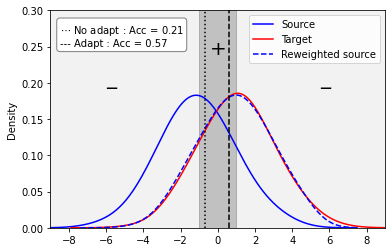

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

weights = adapt_model.predict_weights()
Xs_weighted = np.random.choice(Xs.ravel(), 1000, p=weights/weights.sum())
limit_noadapt = src_only.intercept_ / src_only.coef_
limit_adapt = adapt_model.estimator_.intercept_ / adapt_model.estimator_.coef_
acc_noadapt = src_only.score(Xt, yt)
acc_adapt = adapt_model.estimator_.score(Xt, yt)

k1 = sns.kdeplot(Xs.ravel(), color="blue", bw_method=0.5, label="Source")
k2 = sns.kdeplot(Xt.ravel(), color="red", bw_method=0.5, label="Target")
k3 = sns.kdeplot(Xs_weighted, color="blue", ls="--",
                 bw_method=0.5, label="Reweighted source")

plt.plot([limit_noadapt[0, 0]]*2, [0, 1], ls=":", c="k")
plt.plot([limit_adapt[0, 0]]*2, [0, 1], ls="--", c="k")
plt.fill_between([-1, 1], [0, 0], [1, 1], alpha=0.2, color="k")
plt.fill_between([-9, 9], [0, 0], [1, 1], alpha=0.05, color="k")
plt.text(-6, 0.2, "_", fontsize=20)
plt.text(-0.45, 0.24, "+", fontsize=20)
plt.text(5.5, 0.2, "_", fontsize=20)
plt.ylim(0, 0.3); plt.xlim(-9, 9)

plt.text(-8.5, 0.25, 
         (r"$\cdots$ No adapt : Acc = %.2f"%acc_noadapt + "\n" +
          r"--- Adapt : Acc = %.2f"%acc_adapt),
         bbox=dict(boxstyle='round', fc='w', ec="gray"))
plt.legend(); plt.show();